In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.options.display.max_rows = 99
pd.options.display.max_columns =99
pd.options.display.width = 120

In [215]:
# read files in from disk and concatenate

dirname = 'data/sp500'
files = os.listdir(dirname)
dfs = []
for file in files:  #print(file.split('.')[0], end=' ')
    df = pd.read_csv(os.path.join(dirname, file), header=None, names=['date','open','high','low','close','volume'])
    dfs.append(df)
df = pd.concat(dfs).reset_index().rename(columns={'index':'sym'})
df['date'] = pd.to_datetime(df.date, format='%Y%m%d')

In [216]:
# create working dataframes

sp500 = df.groupby('date')['close'].sum().reset_index().rename(columns={'close': 'sp500_close'})
sp500['sp500_gain'] = sp500['sp500_close'] - sp500['sp500_close'].shift(1)
df = pd.merge(df, sp500, on='date')
df = df[ df['sp500_close'] > 1000 ].sort_values(['sym','date']).reset_index(drop=True)
dfclose = df.pivot(index='date', columns='sym', values='close')
dfclose['sp500'] = sp500.set_index('date')['sp500_close']
dfgain = dfclose - dfclose.shift(1)
dfgain.head()

sym,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AKAM,AKS,ALL,AMAT,AMD,AMGN,AMP,AMT,AMZN,AN,ANF,AON,APA,APC,APD,APH,APOL,ARG,ATI,AVB,AVP,AVY,AXP,AZO,BA,BAC,BAX,BBBY,BBT,BBY,...,TSS,TWX,TXN,TXT,TYC,UNH,UNM,UNP,UPS,URBN,USB,UTX,V,VAR,VFC,VLO,VMC,VNO,VRSN,VTR,VZ,WAT,WDC,WEC,WFC,WFM,WFR,WHR,WIN,WM,WMB,WMT,WPI,WU,WY,WYN,WYNN,X,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZION,sp500
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125,NaN,-0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.625000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.169313
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125013,NaN,0.499999,NaN,4.875001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.392402
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.624998,NaN,1.999999,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.558234
1980-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375,NaN,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.249998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499948,NaN,0.999997,NaN,0.874998,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.501040


In [217]:
# summarise dataframes

summary = pd.DataFrame()
summary['gain_gain'] = dfgain[ (dfgain >  0) & (dfgain.shift(1) >  0) ].sum()
summary['loss_gain'] = dfgain[ (dfgain >  0) & (dfgain.shift(1) <  0) ].sum()
summary['zero_gain'] = dfgain[ (dfgain >  0) & (dfgain.shift(1) == 0) ].sum()
summary['gain_loss'] = dfgain[ (dfgain <= 0) & (dfgain.shift(1) >  0) ].sum()
summary['loss_loss'] = dfgain[ (dfgain <= 0) & (dfgain.shift(1) <  0) ].sum()
summary['zero_loss'] = dfgain[ (dfgain <= 0) & (dfgain.shift(1) == 0) ].sum()
summary['perfect_gain'] = dfgain[dfgain > 0].sum()
summary['perfect_loss'] = dfgain[dfgain <= 0].sum()
summary['buy_on_gain'] = summary['gain_gain'] + summary['gain_loss']
summary['buy_on_loss'] = summary['loss_gain'] + summary['loss_loss']
summary['buy_on_zero'] = summary['zero_gain'] + summary['zero_loss']
summary['count'] = dfgain.count()
summary.drop(['TIE','BRK-B','BMC'], inplace=True)  # drop outliers
#summary = summary[ summary['count'] > 800 ]
summary.head()

,gain_gain,loss_gain,zero_gain,gain_loss,loss_loss,zero_loss,perfect_gain,perfect_loss,buy_on_gain,buy_on_loss,buy_on_zero,count
sym,,,,,,,,,,,,
A,761.267992,722.895723,8.822496,-715.508751,-755.012489,-15.890023,1509.916248,-1505.976262,45.759241,-32.116766,-7.067527,4216
AA,2.850000,1.440001,0.250000,-0.340000,0.000000,0.000000,4.540001,-0.340000,2.510000,1.440001,0.250000,11
AAPL,3764.653340,3515.045970,118.712501,-3169.891821,-4021.017584,-114.922497,7476.521812,-7399.526848,594.761519,-505.971614,3.790004,8998
ABC,927.243622,852.365975,32.812705,-902.303940,-841.303149,-33.525225,1827.852291,-1786.107293,24.939682,11.062826,-0.712520,5385
ABT,1278.190031,1207.527030,101.601130,-1248.703213,-1231.958043,-108.476898,2602.618184,-2597.448148,29.486818,-24.431013,-6.875768,9190


shares margin if buy on gain 14610.330965999996 , buy on loss 3660.485857999991 , buy on zero 271.44152700000103
sp500 margin if buy on gain -864029.0728190009 , buy on loss 920678.674266002 , buy on zero 0.0


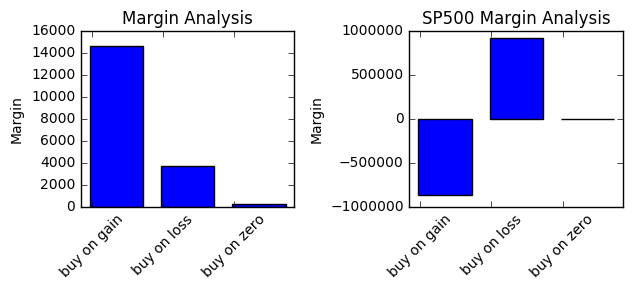

In [218]:
# visualise results

buy_on_gain = summary[ summary.index != 'sp500']['buy_on_gain'].sum()
buy_on_loss = summary[ summary.index != 'sp500']['buy_on_loss'].sum()
buy_on_zero = summary[ summary.index != 'sp500']['buy_on_zero'].sum()
sp500_buy_on_gain = summary[ summary.index == 'sp500']['buy_on_gain'].sum()
sp500_buy_on_loss = summary[ summary.index == 'sp500']['buy_on_loss'].sum()
sp500_buy_on_zero = summary[ summary.index == 'sp500']['buy_on_zero'].sum()

print('shares margin if buy on gain', buy_on_gain, ', buy on loss', buy_on_loss, ', buy on zero', buy_on_zero)
print('sp500 margin if buy on gain', sp500_buy_on_gain, ', buy on loss', sp500_buy_on_loss, ', buy on zero', sp500_buy_on_zero)

plt.figure(figsize=((13,3)))
plt.subplot(1,4,1)
plt.title('Margin Analysis')
plt.bar([1,3,5], [buy_on_gain, buy_on_loss, buy_on_zero], 1.5, align='center');
plt.ylabel('Margin')
plt.xticks([0.3,2.3,4.3], ['buy on gain', 'buy on loss', 'buy on zero'], rotation=45);

plt.subplot(1,4,2)
plt.title('SP500 Margin Analysis')
plt.bar([1,3,5], [sp500_buy_on_gain, sp500_buy_on_loss, sp500_buy_on_zero], 1.5, align='center');
plt.ylabel('Margin')
plt.xticks([0.3,2.3,4.3], ['buy on gain', 'buy on loss', 'buy on zero'], rotation=45)
plt.tight_layout()

In [219]:
# remove columns with companies no longer existing and companues with not much track record
latest_date = str(dfclose.index.max())
drop_cols = [col for col in dfclose.columns if np.isnan(dfclose[[col]].loc[latest_date].values[0]) ] + \
            [col for col in dfclose.columns if dfclose[[col]].notnull().sum().values[0] < 1000 ]
print('Dropping ', drop_cols)
dfgain.drop(drop_cols, axis =1, inplace = True)
dfclose.drop(drop_cols, axis =1, inplace = True)
dfcorr = dfgain.corr()
dfcorr = dfcorr.replace(1,np.NaN)
dfcorr.head()

Dropping  ['CPWR', 'DELL', 'EMC', 'FRX', 'LTD', 'MOLX', 'NYX', 'PCS', 'RSH', 'TLAB', 'TYC', 'WFR', 'AA', 'DTV', 'GCI', 'LIFE', 'MMI', 'NEE', 'NVLS', 'NWSA']


sym,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AKAM,AKS,ALL,AMAT,AMD,AMGN,AMP,AMT,AMZN,AN,ANF,AON,APA,APC,APD,APH,APOL,ARG,ATI,AVB,AVP,AVY,AXP,AZO,BA,BAC,BAX,BBBY,BBT,BBY,BCR,...,TSN,TSO,TSS,TWX,TXN,TXT,UNH,UNM,UNP,UPS,URBN,USB,UTX,V,VAR,VFC,VLO,VMC,VNO,VRSN,VTR,VZ,WAT,WDC,WEC,WFC,WFM,WHR,WIN,WM,WMB,WMT,WPI,WU,WY,WYN,WYNN,X,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZION,sp500
sym,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,NaN,0.068045,0.074660,0.065590,0.233506,0.412003,0.129979,0.205403,0.234997,0.063994,0.055718,-0.027360,0.082743,0.139376,0.090902,0.096059,0.153948,0.349144,0.250451,0.119342,0.158402,0.175365,0.253176,0.171530,0.516890,0.280043,0.153723,0.163973,0.151990,0.146483,0.146959,0.140141,0.194539,0.188794,0.115772,0.161261,0.166014,0.146138,0.024652,0.119696,0.094584,0.120829,0.172154,0.116625,0.041063,0.141787,0.166843,0.228403,0.114906,...,0.097760,0.078634,0.153467,0.265365,0.329111,0.122768,0.061486,0.162360,0.117106,0.222363,0.105550,0.177601,0.165677,0.162256,0.186098,0.062675,0.075794,0.157222,0.165217,0.352534,0.143591,0.179720,0.250683,0.162964,0.057975,0.127657,0.081769,0.177242,0.294434,0.165423,0.181162,0.127844,0.024376,0.378705,0.139023,0.457376,0.361418,0.133553,0.032143,0.095672,0.338481,0.101759,0.144411,0.197942,0.411906,0.142201,0.135007,0.185623,0.049013
AAPL,0.068045,NaN,0.039061,0.031839,0.069087,0.055926,0.077253,0.063710,0.077296,0.070181,0.072007,0.019524,0.048929,0.080694,0.046320,0.045753,0.099017,0.100474,0.035314,0.079597,0.062438,0.048034,0.051062,0.058759,0.135923,0.107257,0.071743,0.073852,0.076300,0.069684,0.101352,0.081691,0.099381,0.069114,0.055812,0.094067,0.123910,0.130157,0.037214,0.065221,0.062064,0.105791,0.084465,0.045092,0.052713,0.068203,0.075018,0.050692,0.062510,...,0.137605,0.068380,0.092161,0.113309,0.073648,0.069072,0.045818,0.087719,0.636535,0.103600,0.061746,0.096957,0.085849,0.046943,0.074012,0.025279,0.060885,0.102369,0.134013,0.062901,0.122337,0.069188,0.074896,0.114012,0.051657,0.080203,0.050190,0.102322,0.092863,0.087033,0.095857,0.071845,-0.018287,0.103988,0.074697,0.135709,0.166029,0.108388,0.061705,0.059701,0.074255,0.089909,0.074609,0.083260,0.054499,0.028674,0.073751,0.081794,0.035530
ABC,0.074660,0.039061,NaN,0.145897,0.095049,0.061870,0.132578,0.101898,0.110713,0.166439,0.145654,0.053497,0.130118,0.133439,0.170279,0.174992,0.140715,0.183051,0.032794,0.072322,0.138553,0.022209,0.049306,0.160778,0.274888,0.127047,0.088569,0.125964,0.079087,0.126242,0.118646,0.128437,0.141024,0.076266,0.086643,0.127839,0.131094,0.142458,0.044751,0.133214,0.085556,0.130478,0.148230,0.085248,0.126586,0.161034,0.163955,0.078147,0.135897,...,0.123475,0.107147,0.180412,0.115613,0.062432,0.120601,0.185827,0.208458,0.111408,0.206282,0.108635,0.192466,0.183903,0.101908,0.186568,0.066824,0.113143,0.180858,0.176137,0.058609,0.150009,0.142615,0.157081,0.138880,0.119526,0.167798,0.085288,0.178494,0.144817,0.196071,0.150503,0.161173,-0.016084,0.264942,0.158552,0.322070,0.144901,0.106350,0.158841,0.163571,0.087502,0.179028,0.192954,0.132862,0.229875,0.032112,0.139518,0.172490,0.037519
ABT,0.065590,0.031839,0.145897,NaN,0.073684,0.059908,0.144491,0.144024,0.102607,0.203979,0.165171,0.074148,0.145943,0.137005,0.146179,0.168295,0.156965,0.239331,0.024118,0.076637,0.175732,0.051099,0.079442,0.118419,0.292072,0.133477,0.082897,0.133131,0.134569,0.138942,0.094818,0.100892,0.155308,0.069155,0.119239,0.099823,0.165461,0.179168,0.111904,0.136664,0.145791,0.128367,0.144295,0.131316,0.195015,0.132372,0.163540,0.087352,0.277391,...,0.144019,0.100644,0.177156,0.088245,0.033568,0.157248,0.148404,0.256937,0.111615,0.230838,0.113427,0.252745,0.226356,0.079972,0.191727,0.086713,0.095527,0.222837,0.234743,0.010353,0.222026,0.225456,0.126811,0.141950,0.171407,0.214211,0.095991,0.189535,0.172491,0.250418,0.153058,0.235068,-0.009940,0.230834,0.195617,0.225677,0.156983,0.120001,0.225858,0.191519,0.067253,0.243289,0.214068,0.1

In [221]:
# find most and least correlated stocks

dfmax = dfcorr.max()
dfmax=dfmax.sort_values(ascending=False)
print(dfmax.head(5))
dfmin = dfcorr.min()
dfmin=dfmin.sort_values(ascending=True)
print(dfmin.head(5))

sym
VNO    0.854468
BXP    0.854468
SPG    0.830663
AVB    0.813590
VTR    0.808187
dtype: float64
sym
FO     -0.166614
TIF    -0.166614
SNDK   -0.125031
C      -0.099062
SAI    -0.099062
dtype: float64


In [222]:
col = 'TIF'
dfcorr[[col]].nsmallest(3, col)

sym,TIF
sym,
FO,-0.166614
WPI,-0.012153
TIE,-0.012105


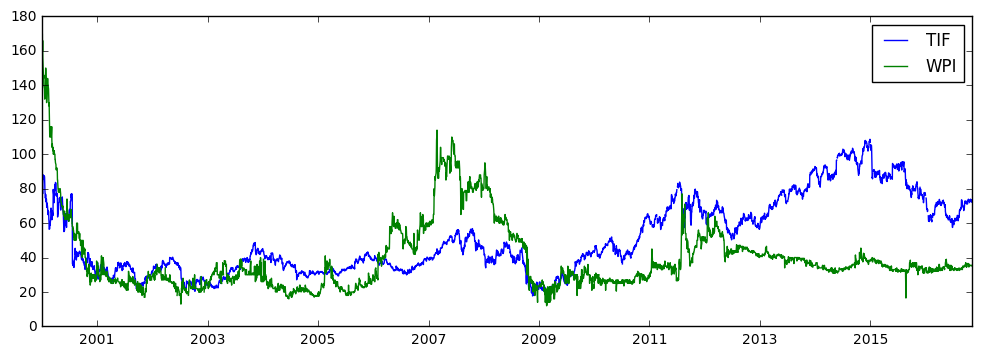

In [223]:
plt.figure(figsize=(12,4))
plt.plot(dfclose.TIF , label = 'TIF')
plt.plot(dfclose.WPI * 100, label = 'WPI')
plt.legend(loc='best')